# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [22]:
# Import numpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [10]:
# Your code here:

infer = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=len(sensor))

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [17]:
# Your code here:
sensor = sensor.set_index(infer)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [32]:
# Your code here:
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposition_plot(df, value, freq):
    
    decomposition = seasonal_decompose(df[value], freq = freq)

    observed = decomposition.observed
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(15,10))
    plt.subplot(411)
    plt.plot(observed, label='Observed')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonal')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.tight_layout()

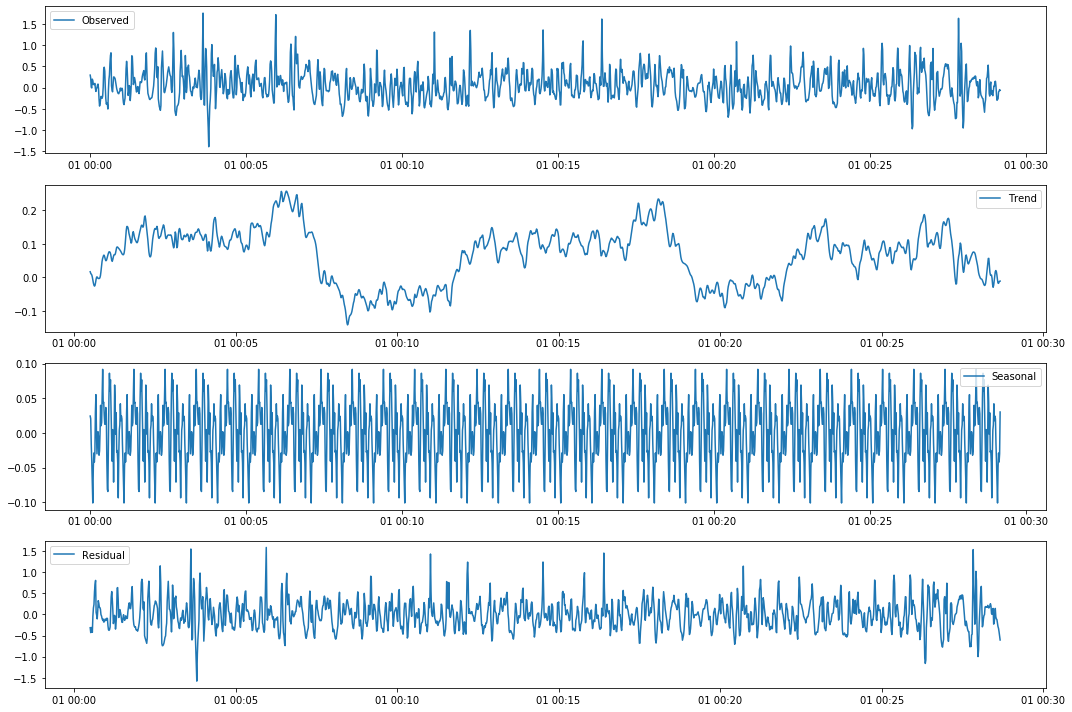

In [33]:
decomposition_plot(sensor, 'userAcceleration.x', 60)

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

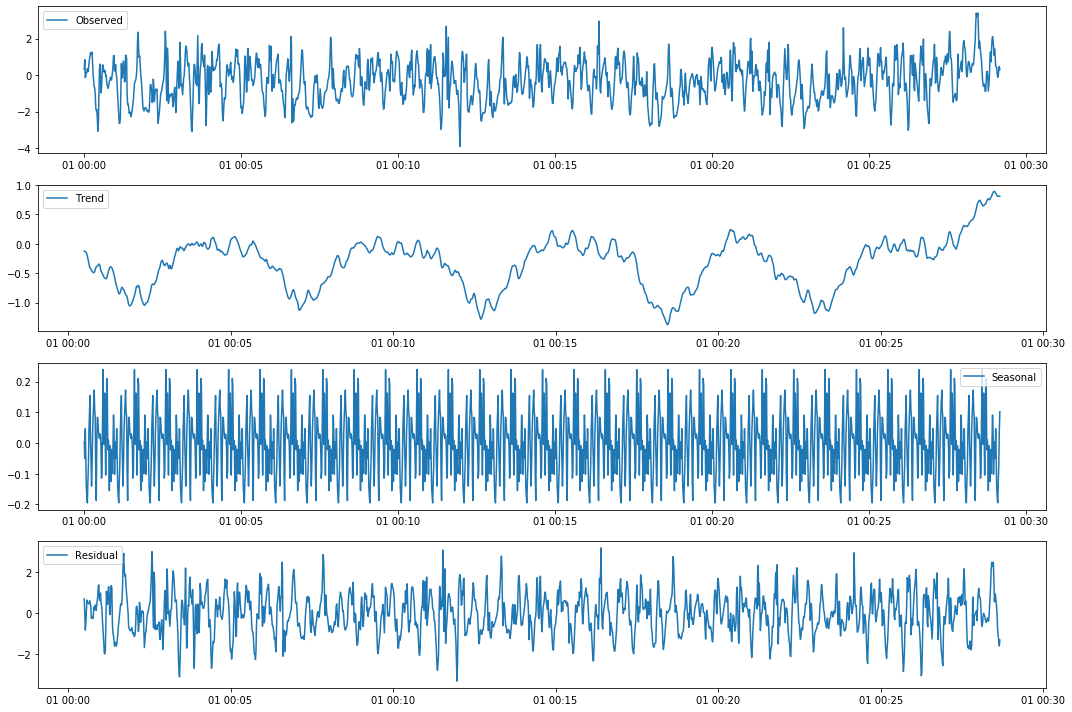

In [34]:
decomposition_plot(sensor, 'rotationRate.x', 60)

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [40]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

def adfuller_results (df, col):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[col])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

In [41]:
adfuller_results(sensor, 'rotationRate.x')

Results of Dickey-Fuller Test:
Test Statistic                   -5.269861
p-value                           0.000006
#Lags Used                       25.000000
Number of Observations Used    1725.000000
Critical Value (1%)              -3.434147
Critical Value (5%)              -2.863217
Critical Value (10%)             -2.567663
dtype: float64


In [42]:
adfuller_results(sensor, 'userAcceleration.x')

Results of Dickey-Fuller Test:
Test Statistic                -1.795799e+01
p-value                        2.823439e-30
#Lags Used                     4.000000e+00
Number of Observations Used    1.746000e+03
Critical Value (1%)           -3.434101e+00
Critical Value (5%)           -2.863197e+00
Critical Value (10%)          -2.567652e+00
dtype: float64


What are your conclusions from this test?

In [13]:
# Your conclusions here:

